In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle datasets download -d vagifa/ethereum-frauddetection-dataset
!unzip ethereum-frauddetection-dataset.zip

  0% 0.00/923k [00:00<?, ?B/s]
100% 923k/923k [00:00<00:00, 122MB/s]
Archive:  ethereum-frauddetection-dataset.zip
  inflating: transaction_dataset.csv  


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

In [4]:
df = pd.read_csv('transaction_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [5]:
df.drop(['Unnamed: 0','Index'],axis =1,inplace = True)
df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [6]:
# Checking the counts of each label (fraud and non-fraud)

print(df['FLAG'].value_counts())

print()
#Checking if there is rows without determining whether the transaction is fraud or not

print(df['FLAG'].isnull().sum())

0    7662
1    2179
Name: FLAG, dtype: int64

0


In [7]:
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000

In [8]:
# Looking at the number if null values of each feature

print (df.isnull().sum()[df.isnull().sum()>0])

print()
# Checking the number of unique values on these specific categorical features

print(df[' ERC20_most_rec_token_type'].nunique())
print(df[' ERC20 most sent token type'].nunique())

 Total ERC20 tnxs                       829
 ERC20 total Ether received             829
 ERC20 total ether sent                 829
 ERC20 total Ether sent contract        829
 ERC20 uniq sent addr                   829
 ERC20 uniq rec addr                    829
 ERC20 uniq sent addr.1                 829
 ERC20 uniq rec contract addr           829
 ERC20 avg time between sent tnx        829
 ERC20 avg time between rec tnx         829
 ERC20 avg time between rec 2 tnx       829
 ERC20 avg time between contract tnx    829
 ERC20 min val rec                      829
 ERC20 max val rec                      829
 ERC20 avg val rec                      829
 ERC20 min val sent                     829
 ERC20 max val sent                     829
 ERC20 avg val sent                     829
 ERC20 min val sent contract            829
 ERC20 max val sent contract            829
 ERC20 avg val sent contract            829
 ERC20 uniq sent token name             829
 ERC20 uniq rec token name      

In [9]:
#checking for dupplicated values
df[df.duplicated()== True]
df.drop_duplicates(inplace = True)

### Renaming The Features Names To The Same Names Without Spaces
df_copy = df.copy()
for i in df_copy.columns:
    df_copy.rename(columns=str.strip,inplace = True)
    
### Making Mean Imputatinons To Numeric Values
for i in df_copy.columns:
    if df_copy[i].isnull().sum() == 829:
        df_copy[i].replace({np.NaN:df_copy[i].mean()},inplace=True)
    else:
        pass
    
    
#checking again the number of nulls, expecting only 2 categorical values to stay with null values
print(df_copy.isnull().sum()[df_copy.isnull().sum()>0])


#looking at the value counts of the categorical feature
print(f"Value Counts of Categorical feature: \n{df_copy['ERC20_most_rec_token_type'].value_counts()}")

ERC20 most sent token type    841
ERC20_most_rec_token_type     851
dtype: int64
Value Counts of Categorical feature: 
0                        4388
OmiseGO                   870
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            205
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: ERC20_most_rec_token_type, Length: 467, dtype: int64


In [10]:
#cleaning the categorical feature - changing 0 values to null, cause a 0 value doesnt mean anything in categorical features
df_copy['ERC20_most_rec_token_type'].replace({'0':np.NaN},inplace = True)
df_copy['ERC20 most sent token type'].replace({'0':np.NaN},inplace = True)

In [11]:
#looking for nulls this feature
print(df_copy['ERC20 most sent token type'].isnull().sum()/len(df_copy))
print(df_copy['ERC20 most sent token type'].max)

0.5323221011910821
<bound method NDFrame._add_numeric_operations.<locals>.max of 0            Cofoundit
1       Livepeer Token
2                 None
3               Raiden
4        StatusNetwork
             ...      
9836                  
9837                  
9838                  
9839               NaN
9840                  
Name: ERC20 most sent token type, Length: 9823, dtype: object>


In [12]:
#making a list of the features which is their variance is equal to 0
to_drop = list(df_copy.var()[df_copy.var() == 0].keys())
print(to_drop)


#droping those featues
df_copy.drop(list(df_copy.var()[df_copy.var() == 0].keys()),inplace = True, axis = 1)
df_copy.describe()

#we also can see that we still have 5 features that their std are very close to 0 ,
#we want to drop them also

<ipython-input-12-a3803d0ad01a>:2: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-12-a3803d0ad01a>:2: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-12-a3803d0ad01a>:7: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-12-a3803d0ad01a>:7: FutureWarning:

The default v

['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val sent contract', 'ERC20 max val sent contract', 'ERC20 avg val sent contract']


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9.823000e+03,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9.823000e+03,9.823000e+03,9.823000e+03,9823.000000,9823.000000
mean,0.221826,5092.595652,8011.602499,2.184347e+05,116.074417,163.972106,3.736537,30.406495,25.868472,43.785903,523.692459,100.638887,4.806480,314.528353,44.638924,0.000003,0.000008,0.000005,283.783060,1.017806e+04,1.165818e+04,0.000008,1.480124e+03,36.292751,1.298795e+08,1.389373e+07,111.161233,5.646765,7.604514,0.003447,4.899933,486.518054,1.255029e+08,4.354898e+06,1.176474e+04,1.306006e+07,6.331012e+06,1.381588,4.824772
std,0.415496,21505.395360,23097.130771,3.229212e+05,757.890300,941.675903,141.575042,298.892226,264.058187,326.137833,13020.716151,2887.614225,138.736510,6635.215478,239.127317,0.000226,0.000516,0.000324,1353.589778,3.586507e+05,3.645380e+05,0.000516,2.426474e+05,428.643901,1.009413e+10,1.130608e+09,5870.162737,100.813198,78.364945,0.062927,16.495373,16171.227263,1.009300e+10,2.050888e+08,1.009134e+06,1.130143e+09,5.665313e+08,6.430608,15.951623
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.171250e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424921,0.000000,0.160818,0.085688,0.000000,0.000000,0.000000,4.000000,2.251911e-01,2.674521e+00,0.000000,6.207450e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,17.340000,513.420000,4.695758e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095006,6.000000,1.724272,0.049139,4.999276,1.599475,0.000000,0.000000,0.000000,8.000000,1.244669e+01,3.050000e+01,0.000000,1.722000e-03,1.000000,7.421845e-01,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.371030e-01,4.379480e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,564.305000,5494.510000,3.041145e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,66.992806,22.000000,0.998800,61.337946,21.999380,0.000000,0.000000,0.000000,54.000000,1.009990e+02,1.010000e+02,0.000000,4.473055e-02,6.000000,7.240325e+02,0.000000e+00,0.000000,0.000000,4.000000,0.000000,4.000000,0.521498,6.000000e+02,1.497619e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831

In [13]:
df_copy.drop(['min value sent to contract','max val sent to contract','avg value sent to contract'\
              ,'total ether sent contracts','ERC20 uniq sent addr.1', 'Address']\
             ,axis =1 , inplace = True)

In [14]:
# filling with mode the categorical missing vaue
df_copy = df_copy.fillna(df_copy.mode().iloc[0])
df_copy.isnull().sum()[df_copy.isnull().sum()>0]

Series([], dtype: int64)

In [15]:
corr = df_copy.corr()
corr_df = corr[corr>0.6].dropna(axis = 1 ,thresh = 2)
corr_df = corr_df[corr_df != 1]
to_drop = corr_df[corr_df>0.9]
to_drop.values[to_drop.values>0]
to_drop.unstack().sort_values(kind="quicksort")[to_drop.unstack()>0]

<ipython-input-15-e2f051e036b2>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ERC20 total ether sent        ERC20 min val sent              0.999311
ERC20 min val sent            ERC20 total ether sent          0.999311
ERC20 total ether sent        ERC20 avg val sent              0.999566
ERC20 avg val sent            ERC20 total ether sent          0.999566
ERC20 uniq rec contract addr  ERC20 uniq rec token name       0.999641
ERC20 uniq rec token name     ERC20 uniq rec contract addr    0.999641
ERC20 total ether sent        ERC20 max val sent              0.999649
ERC20 max val sent            ERC20 total ether sent          0.999649
ERC20 min val sent            ERC20 max val sent              0.999729
ERC20 max val sent            ERC20 min val sent              0.999729
ERC20 min val sent            ERC20 avg val sent              0.999785
ERC20 avg val sent            ERC20 min val sent              0.999785
ERC20 max val sent            ERC20 avg val sent              0.999952
ERC20 avg val sent            ERC20 max val sent              0.999952
ERC20 

In [16]:
## Correlation Analysis

corr = df_copy.corr()
corr_df = corr[corr>0.6].dropna(axis = 1 ,thresh = 2)
corr_df = corr_df[corr_df != 1]
to_drop = corr_df[(corr_df>0.6) & (corr_df<0.9)]
to_drop.values[to_drop.values>0]
to_drop = to_drop.unstack().sort_values(kind="quicksort")[to_drop.unstack()>0]


df_droped_corr = df_copy.drop(['ERC20 total ether sent','ERC20 avg val sent','ERC20 uniq rec token name','ERC20 min val sent',\
                              'ERC20 max val sent','ERC20 max val rec'], axis =1)


df.copy = df_droped_corr.copy()
to_drop

<ipython-input-16-be8a26daf19a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



max value received                                    avg val received                                        0.622960
avg val received                                      max value received                                      0.622960
Received Tnx                                          Unique Received From Addresses                          0.648650
Unique Received From Addresses                        Received Tnx                                            0.648650
Sent tnx                                              Unique Sent To Addresses                                0.670002
Unique Sent To Addresses                              Sent tnx                                                0.670002
ERC20 uniq rec addr                                   Total ERC20 tnxs                                        0.717138
Total ERC20 tnxs                                      ERC20 uniq rec addr                                     0.717138
ERC20 uniq sent addr                            

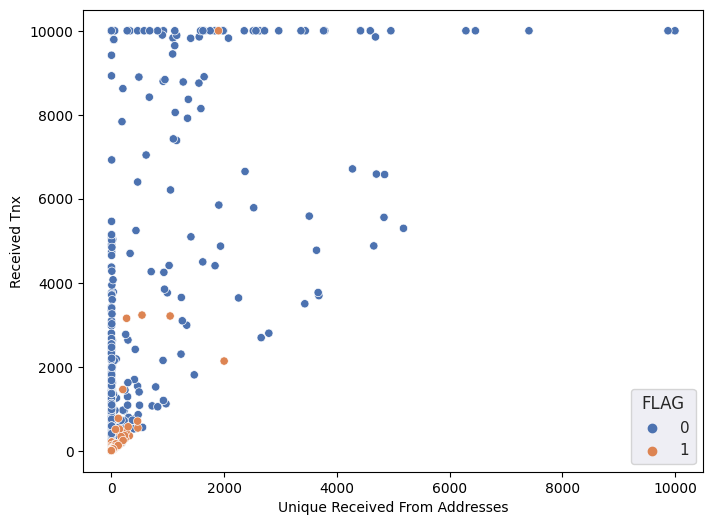

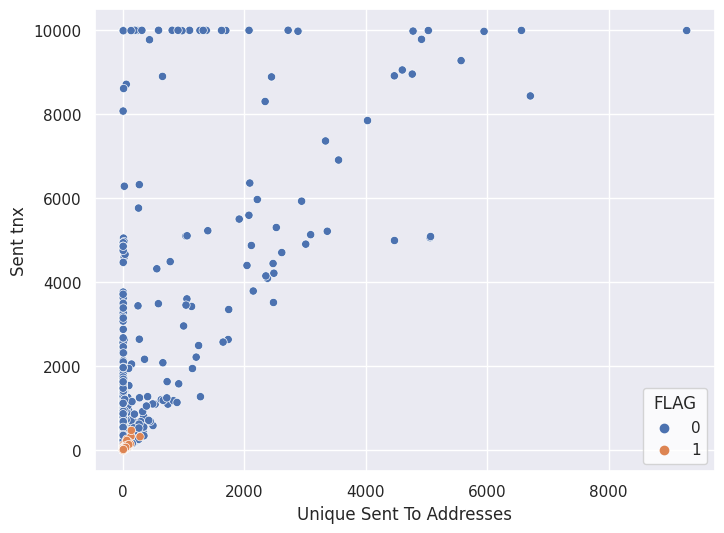

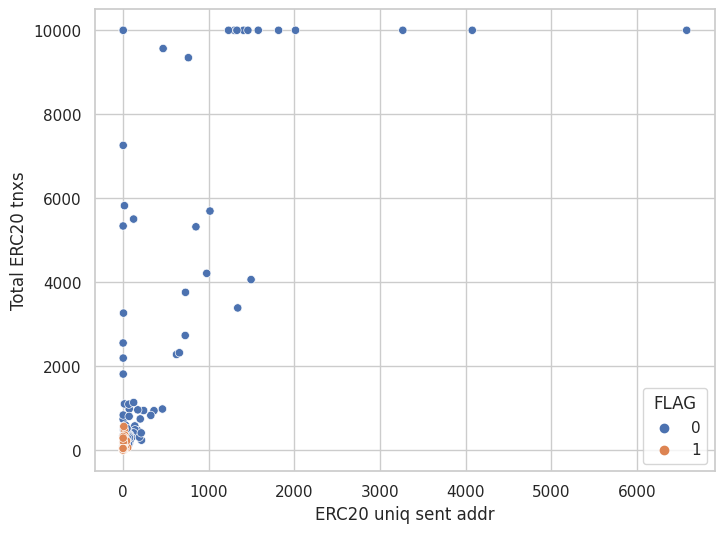

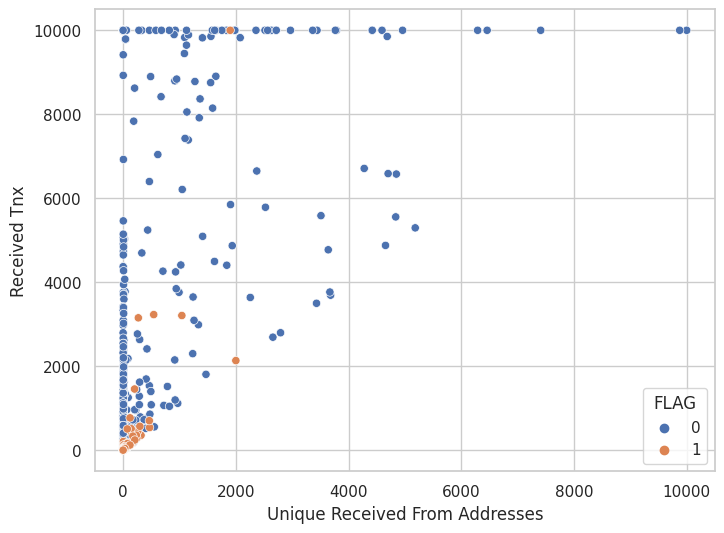

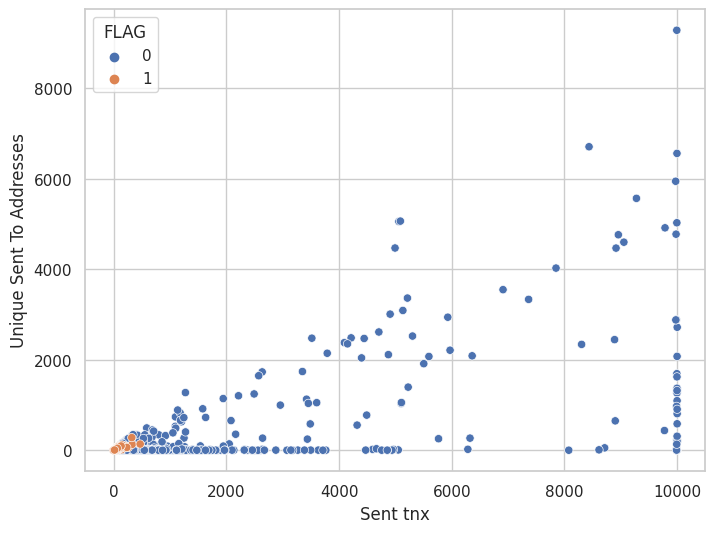

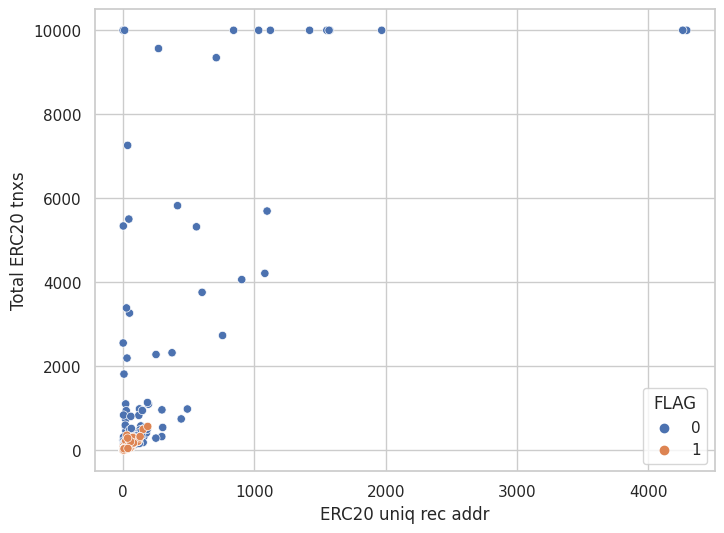

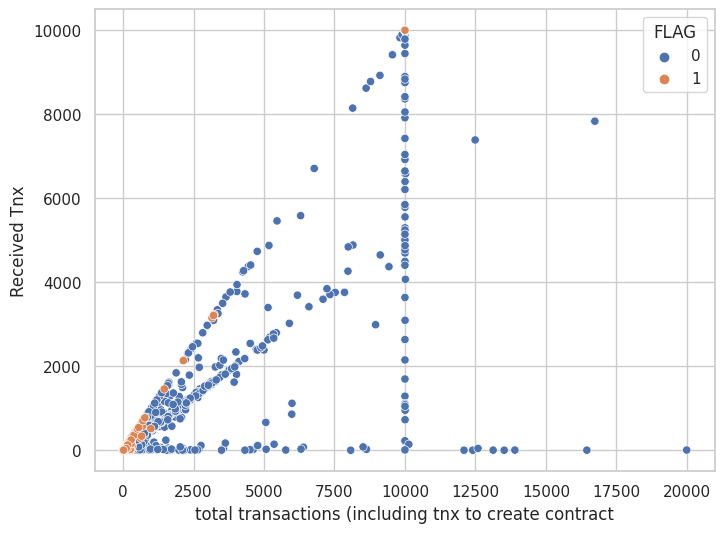

In [17]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df_copy,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df_copy,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'ERC20 uniq sent addr', y= 'Total ERC20 tnxs',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'ERC20 uniq rec addr', y= 'Total ERC20 tnxs',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df_droped_corr,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

In [18]:
# looking at the correlation to the label
df_copy.corr()['FLAG'].sort_values(ascending= False)

<ipython-input-18-28f091cad748>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



FLAG                                                    1.000000
ERC20 min val sent                                      0.020860
ERC20 avg val sent                                      0.020597
ERC20 max val sent                                      0.020593
ERC20 total ether sent                                  0.020365
ERC20 total Ether sent contract                         0.011106
ERC20 min val rec                                       0.009166
ERC20 uniq sent token name                              0.007806
min val sent                                            0.006603
ERC20 avg val rec                                       0.006470
total ether balance                                    -0.003236
ERC20 max val rec                                      -0.003557
ERC20 total Ether received                             -0.003690
avg val received                                       -0.011871
Number of Created Contracts                            -0.013741
ERC20 uniq rec addr      

<ipython-input-19-05ce2d786354>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-19-05ce2d786354>:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



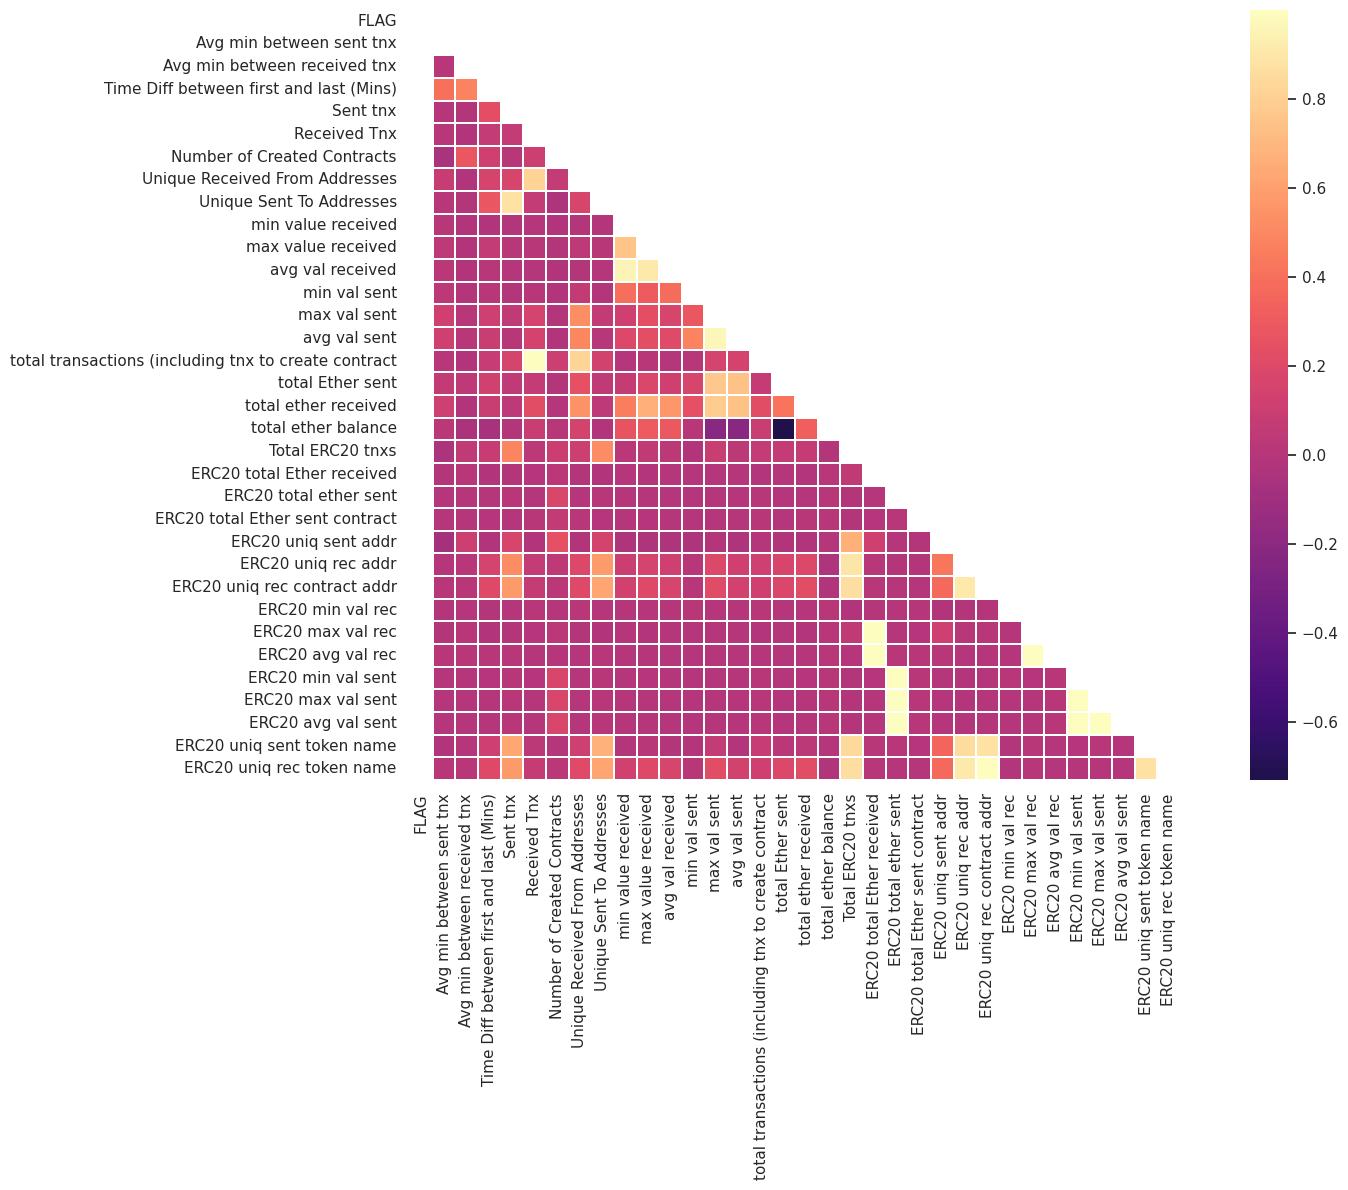

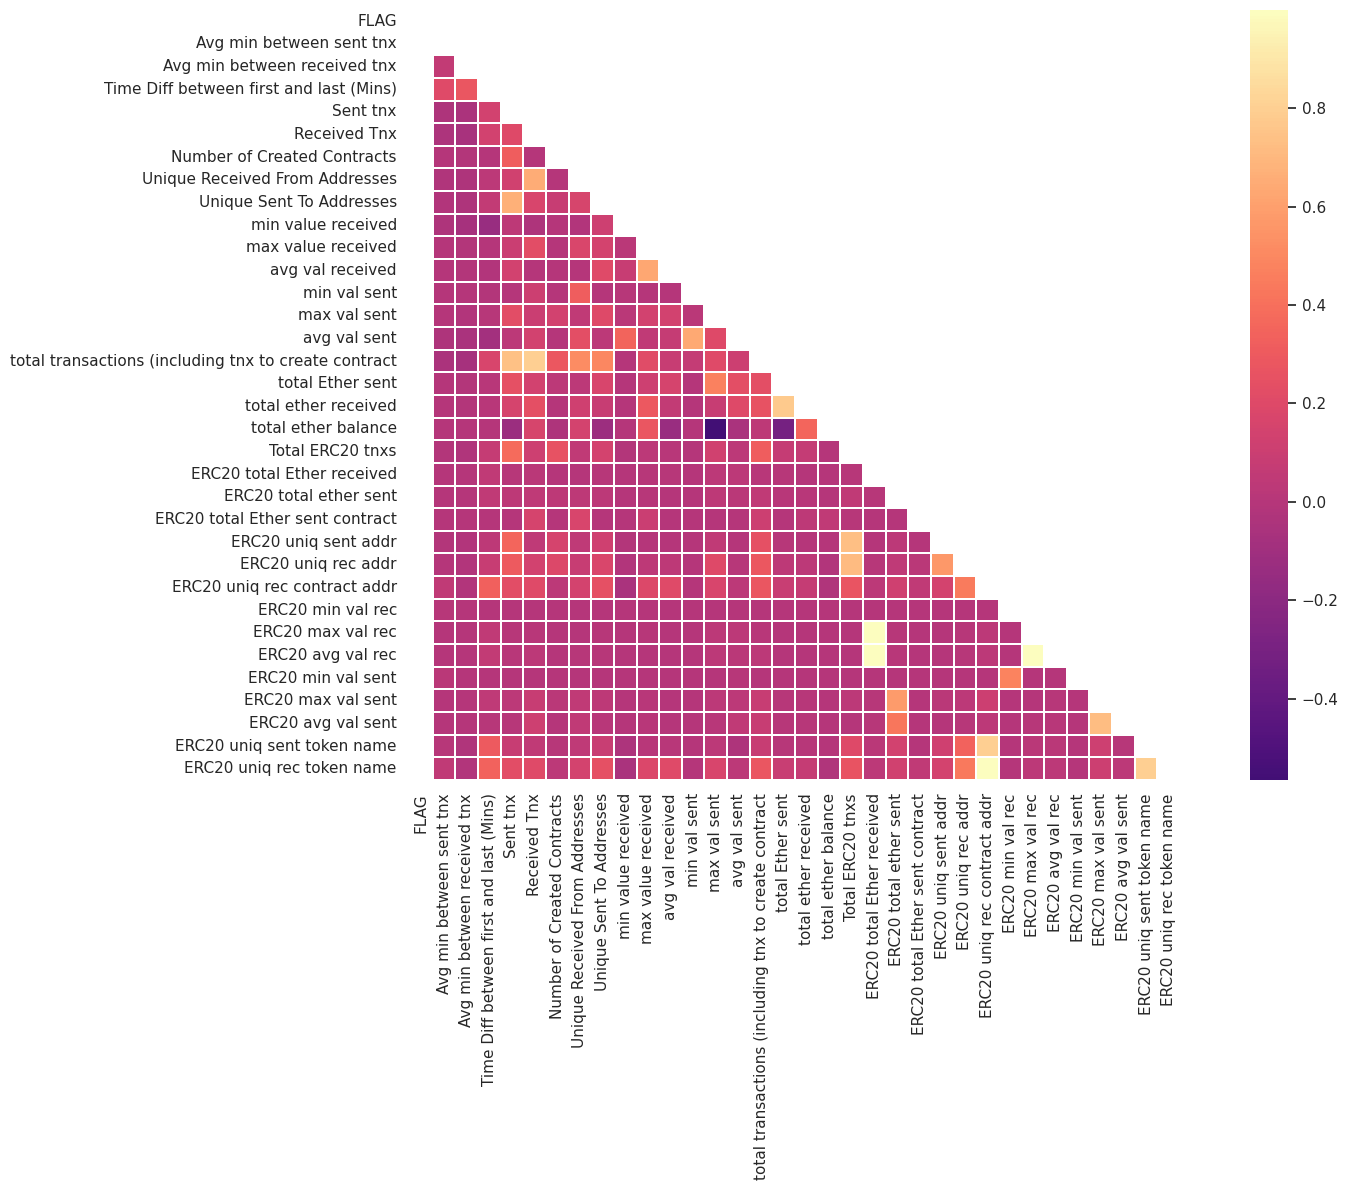

In [19]:
# Correlation metrix for each label - fraud and non-fraud
sample = df_copy[df_copy['FLAG']==1]
corr = sample.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='magma', center=0, linewidths=0.1, square=True)

# Non-Fraudulant Correlation
sample = df_copy[df_copy['FLAG']==0]
corr = sample.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='magma', center=0, linewidths=0.1, square=True)

In [20]:
# removing outliers
# Finding some outliers due to the scatter plots I ploted before.
# later we will check if deleting them will improve our model results
df_copy[(df_copy['Received Tnx']>3000)&(df_copy['FLAG'] == 1)& (df_copy['Received Tnx']<4000)].index

Int64Index([8408, 9219, 9322], dtype='int64')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:blue'` for same effect.



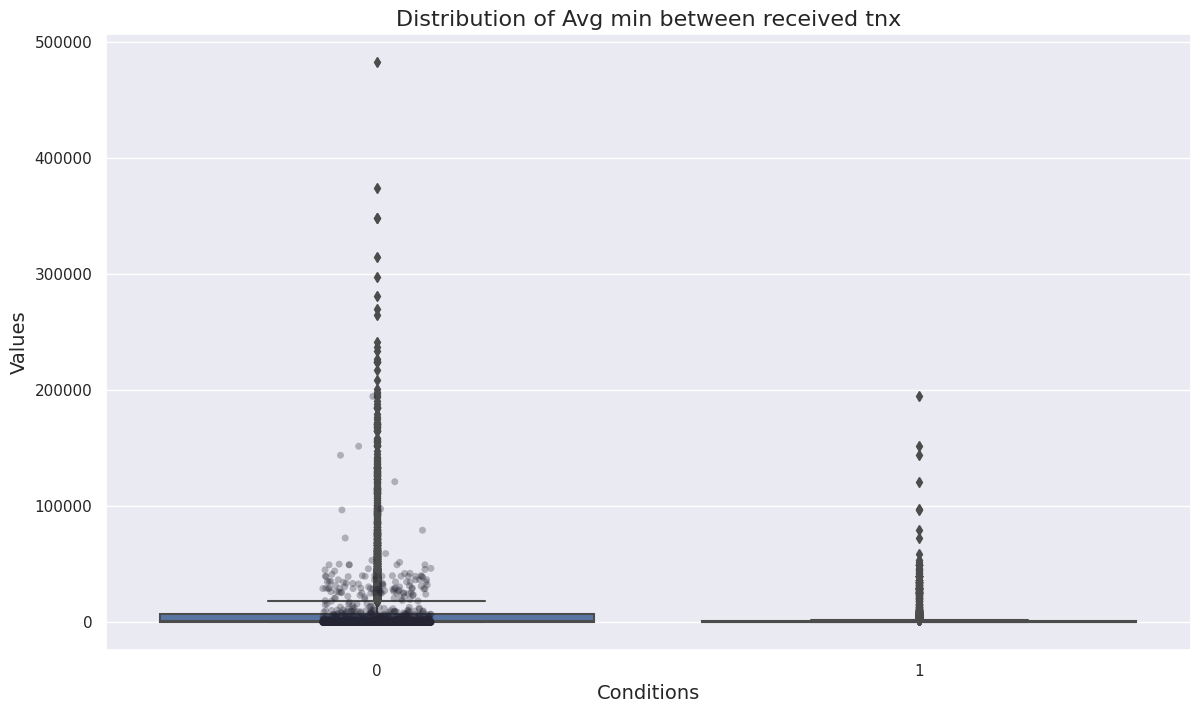

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:blue'` for same effect.



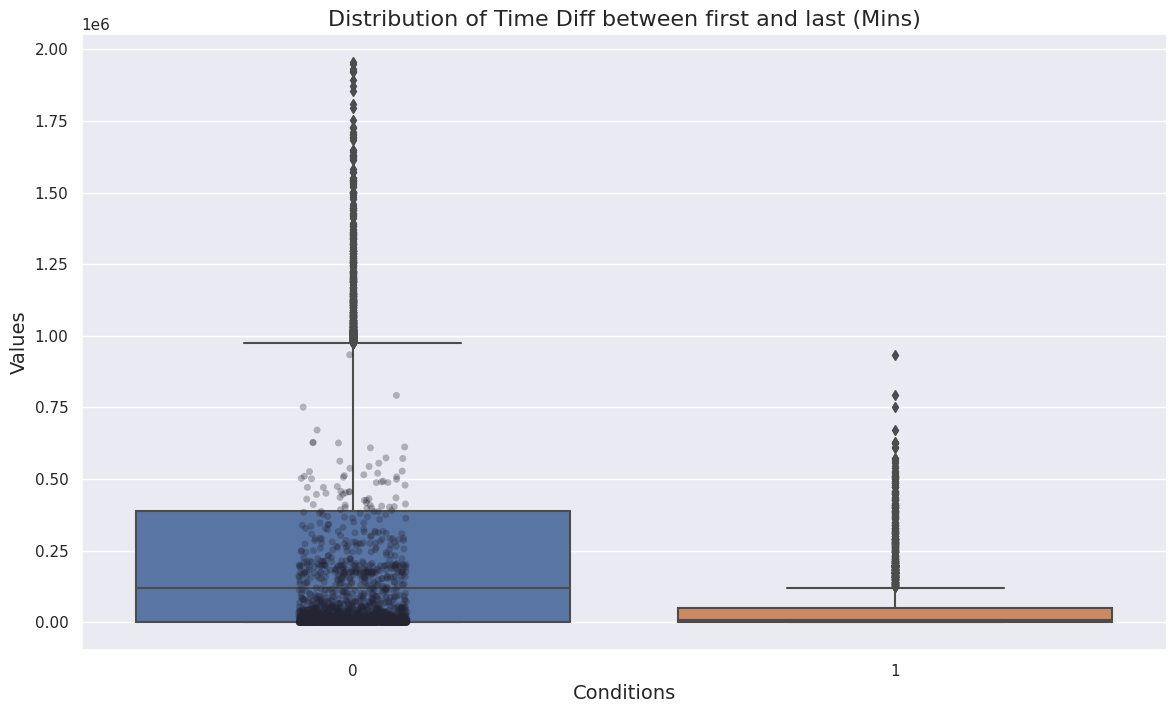

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:blue'` for same effect.



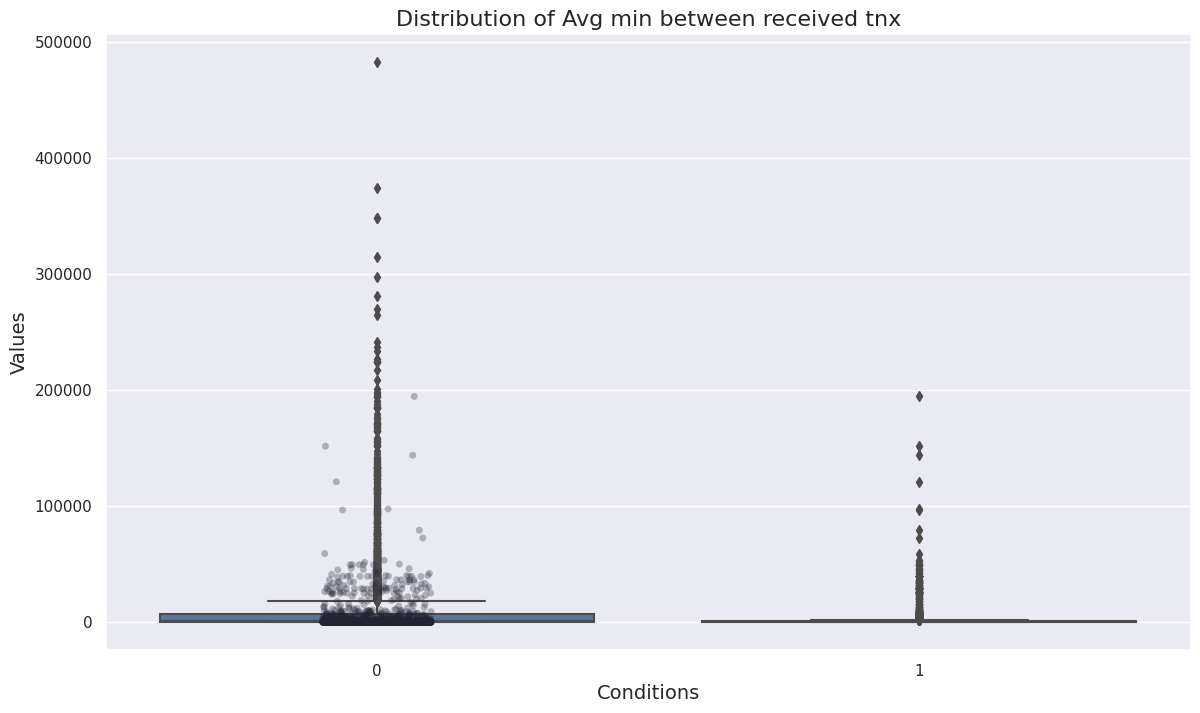

In [21]:
sns.set(style = 'darkgrid')
data1 = df_copy['Avg min between received tnx'][df_copy['FLAG']==0]
data2 = df_copy['Avg min between received tnx'][df_copy['FLAG']==1]
plt.subplots(figsize = (14, 8))
boxplot = sns.boxplot(data=[data1,data2])
boxplot = sns.stripplot(data=[data1,data2] ,marker="o", alpha=0.3, color="blue")
boxplot.axes.set_title("Distribution of Avg min between received tnx", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()


data1 = df_copy['Time Diff between first and last (Mins)'][df_copy['FLAG']==0]
data2 = df_copy['Time Diff between first and last (Mins)'][df_copy['FLAG']==1]
plt.subplots(figsize = (14, 8))
boxplot = sns.boxplot(data=[data1,data2])
boxplot = sns.stripplot(data=[data1,data2] ,marker="o", alpha=0.3, color="blue")
boxplot.axes.set_title("Distribution of Time Diff between first and last (Mins)", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()


data1 = df_copy['Avg min between received tnx'][df_copy['FLAG']==0]
data2 = df_copy['Avg min between received tnx'][df_copy['FLAG']==1]
plt.subplots(figsize = (14, 8))
boxplot = sns.boxplot(data=[data1,data2])
boxplot = sns.stripplot(data=[data1,data2] ,marker="o", alpha=0.3, color="blue")
boxplot.axes.set_title("Distribution of Avg min between received tnx", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

In [22]:
outliers_1 = df_copy['Time Diff between first and last (Mins)'][
    (df_copy['FLAG'] == 1) & 
                                (df_copy['Time Diff between first and last (Mins)']>600000)]
df_copy.drop(outliers_1.index, axis = 0, inplace = True)



outliers_2 = df_copy[(df_copy['FLAG']==1)&(df_copy['Avg min between received tnx']>60000)]
#df_for_changes.drop(outliers_2.index, axis = 0, inplace = True)


outliers_3 = df_copy[(df_copy['Received Tnx']>8000)&(df_copy['FLAG'] ==1)]
outliers_3
print(outliers_1)

print(df_copy['Avg min between received tnx'][(df_copy['FLAG']==0)& (df_copy['Avg min between received tnx'] >400000)].index)
print()
print(df_copy['Avg min between received tnx'][(df_copy['FLAG']==1)& (df_copy['Avg min between received tnx'] >140000)].index)

7788    933778.82
7828    608926.62
7866    611848.42
8534    625703.30
8953    750845.88
9267    626664.22
9319    791866.28
9717    628201.80
9840    670817.33
Name: Time Diff between first and last (Mins), dtype: float64
Int64Index([185], dtype='int64')

Int64Index([9806], dtype='int64')


In [ ]:
#label encoding

In [23]:
# Exchange features with more than 50 categories (unique values)
df_1 = df_copy.copy()
label_encoding_features = [] # the list will hold the categorical features that we'll exchange by 'Label Encoding'
categorial_features_dict = {} # the dict will hold feature as keys, and transform categories dict as values

for feature in df_copy[['ERC20_most_rec_token_type','ERC20 most sent token type']].columns:
    if df_copy[feature].nunique() >= 50: # if there are more than different 50 categories - we'll use 'Label Encoding'
        label_encoding_features.append(feature)
        categorial_features_dict[feature] = {} # the dict will hold the original values as keys, and running number (category) as values
        i = 1 # running number (category)
        for sample in df_copy[feature]:
            if sample not in categorial_features_dict[feature].keys() and sample is not np.nan: # we want to replace each value (that isn't 'null') by the dict
                categorial_features_dict[feature][sample] = i
                i += 1

        df_copy[feature].replace(categorial_features_dict[feature], inplace = True) # exchange categories in the original dataframe
        df_copy[feature].replace(categorial_features_dict[feature], inplace = True) # exchange categories in df_categorical

In [24]:
# Removing Features With Small Correlation To The Label¶
dropping_corr=df_copy.drop(['ERC20 min val rec','ERC20 uniq sent token name','min val sent','ERC20 avg val rec',\
             'total ether balance','ERC20 max val rec','ERC20 total Ether received'],axis =1)


corr_decesion = pd.DataFrame(df_copy.corr()['FLAG'].sort_values(ascending= False))
d = corr_decesion[(corr_decesion['FLAG']<0.02) & (corr_decesion['FLAG']>-0.02)].index


dropping_corr = df_copy.drop(d,axis =1)
dropping_corr 

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,min value received,max val sent,avg val sent,total transactions (including tnx to create contract,Total ERC20 tnxs,ERC20 total ether sent,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,40,118,0.000000,31.220000,1.200681,810,265.000000,3.560317e+07,0.000000,1.683100e+07,2.717799e+05,1,1
1,0,12709.07,2958.44,1218216.73,94,8,5,14,0.000000,1.800000,0.032844,102,8.000000,2.260809e+00,2.260809,2.260809e+00,2.260809e+00,2,2
2,0,246194.54,2434.02,516729.30,2,10,10,2,0.113119,3.538616,1.794308,12,8.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3,3
3,0,10219.60,15785.09,397555.90,25,9,7,13,0.000000,450.000000,70.001834,34,14.000000,1.141223e+04,100.000000,9.029231e+03,3.804077e+03,4,3
4,0,36.61,10707.77,382472.42,4598,20,7,19,0.000000,9.000000,0.022688,4619,42.000000,1.235399e+05,0.000000,4.500000e+04,1.372666e+04,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,1,0.00,0.00,8427.92,0,1,1,0,0.000000,0.000000,0.000000,2,36.292751,1.389373e+07,11764.738134,1.306006e+07,6.331012e+06,3,5
9836,1,12635.10,631.39,58748.48,4,13,11,4,0.004082,12.200000,9.166365,17,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,262,400
9837,1,0.00,0.00,0.00,0,0,0,0,0.000000,0.000000,0.000000,0,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,262,390
9838,1,2499.44,2189.29,261601.88,67,43,31,44,0.001078,9.500000,0.922179,110,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,262,250


## Building the model

In [27]:

# Logistic Regression with the 2 categorical features
sns.set(style = 'white')

X = df_copy.drop(['FLAG',],axis =1)
Y = df_copy['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)


In [28]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [31]:

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 10000)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)


print(classification_report(y_test,y_pred))


confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2319
           1       0.95      0.56      0.70       626

    accuracy                           0.90      2945
   macro avg       0.92      0.77      0.82      2945
weighted avg       0.90      0.90      0.89      2945



array([[2300,   19],
       [ 278,  348]])

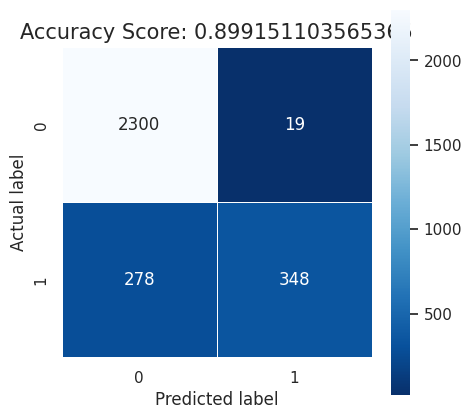

In [32]:

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()

In [33]:
##Random Forest with MinMax Normalization
X = df_copy.drop(['FLAG'],axis =1)
Y = df_copy['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)



scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rfc = RandomForestClassifier(n_estimators=25,max_features= 5,random_state = 101)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


print(classification_report(y_test,y_pred))



confusion_matrix(y_test,y_pred)



              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2319
           1       1.00      0.98      0.99       626

    accuracy                           1.00      2945
   macro avg       1.00      0.99      0.99      2945
weighted avg       1.00      1.00      1.00      2945



array([[2319,    0],
       [  13,  613]])

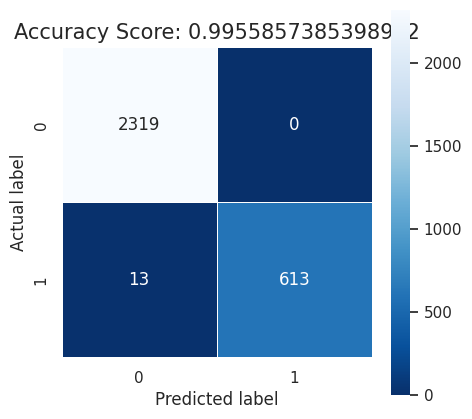

In [34]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
# import pickle
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))



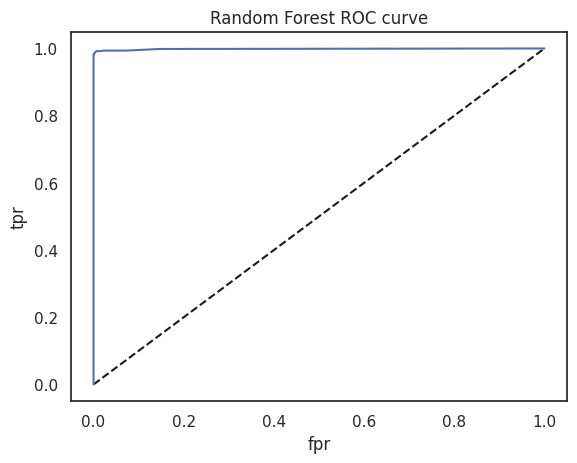

In [35]:
from sklearn.metrics import roc_curve

# plot roc curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2295
           1       0.94      0.94      0.94       649

    accuracy                           0.97      2944
   macro avg       0.96      0.96      0.96      2944
weighted avg       0.97      0.97      0.97      2944



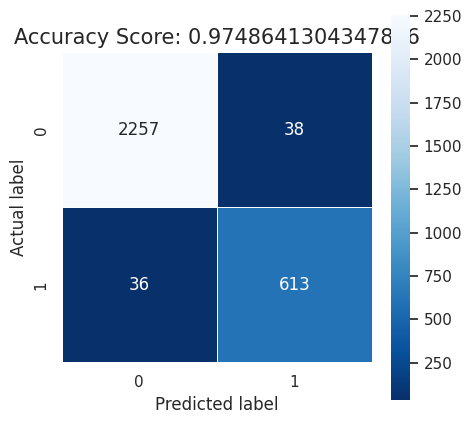

In [37]:
#SVM model, not good as the random forest

from sklearn.svm import SVC

X = df_copy.drop([185, 9806],axis = 0).drop(['FLAG'],axis =1)
Y = df_copy.drop([185, 9806],axis = 0)['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(kernel ='rbf', C=9)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

confusion_matrix(y_test,y_pred)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()


In [38]:
# Grid search for SVM
param_grid = {'C':[i for i in range(1,10,1)],'kernel':['linear','rbf','poly']}
grid = GridSearchCV(model,param_grid,scoring = 'recall')
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(C=9),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='recall')

In [39]:
grid.best_params_

{'C': 9, 'kernel': 'rbf'}

## PCA

[[2238   57]
 [  82  567]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2295
           1       0.91      0.87      0.89       649

    accuracy                           0.95      2944
   macro avg       0.94      0.92      0.93      2944
weighted avg       0.95      0.95      0.95      2944



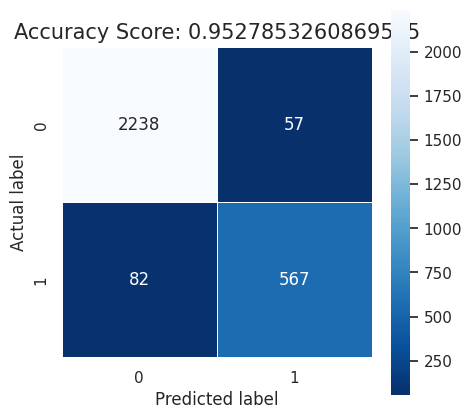

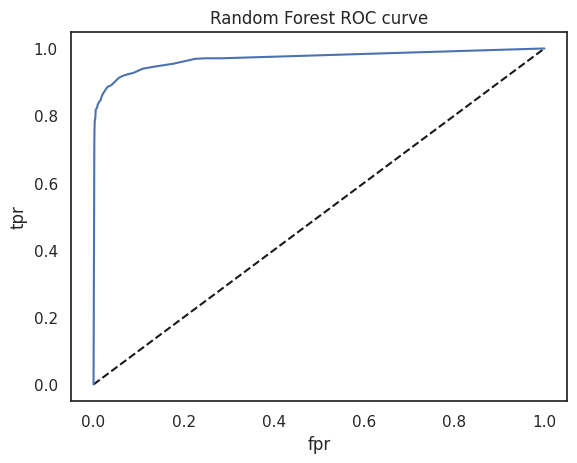

In [40]:
#PCA and then trying to improve the random forest model, that is already wonderfull - the results without PCA are better

X = df_copy.drop([185, 9806],axis = 0).drop(['FLAG'],axis =1)
Y = df_copy.drop([185, 9806],axis = 0)['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca_model = PCA(n_components= 5)
X = pca_model.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 42)

rfc = RandomForestClassifier(n_estimators=25,max_features= 5,random_state = 101)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()

# plot roc curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()



In [ ]:
# we will use the random forest model to make predictions in django

# import pickle
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))